In [29]:


from seaborn import regplot, set_style
from matplotlib.pyplot import show, suptitle
from scipy.stats import linregress
from IPython.display import display

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib
from matplotlib import cm
import datetime as dt     
import pandas as pd
import seaborn as sns
sns.set_style("white")
np.random.seed(271828)
%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format
matplotlib.rcParams['figure.figsize']=[10,6]
import statsmodels.api as sm

In [2]:
food = pd.read_csv('food_coded.csv')
food.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.40,2,1,430,3,315,1,none,we dont have comfort,9,...,1,1,1,1165,345,car racing,5,1,1315,187
1,3.65,1,1,610,3,420,2,"chocolate, chips, ice cream","Stress, bored, anger",1,...,1,1,2,725,690,Basketball,4,2,900,155
2,3.30,1,1,720,4,420,2,"frozen yogurt, pizza, fast food","stress, sadness",1,...,1,2,5,1165,500,none,5,1,900,159
3,3.20,1,1,430,3,420,2,"Pizza, Mac and cheese, ice cream",Boredom,2,...,1,2,5,725,690,NaN,3,1,1315,240
4,3.50,1,1,720,2,420,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1,...,1,1,4,940,500,Softball,4,2,760,190


In [3]:
print(food['GPA'].mean())
print(food['weight'].mean())

3.418663999999998
159.048


In [4]:
from scipy.stats import pearsonr,spearmanr,kendalltau
from pandas import DataFrame

In [5]:
# select colums only with numeric variable
numeric_variables=food.drop(['comfort_food','comfort_food_reasons','diet_current','eating_changes','father_profession','father_profession','fav_cuisine','food_childhood','healthy_meal','ideal_diet','meals_dinner_friend','mother_profession','type_sports'],axis=1)
numeric_variables.head()


,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food_reasons_coded,cook,comfort_food_reasons_coded1,...,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,veggies_day,vitamins,waffle_calories,weight
0,2.40,2,1,430,3,315,1,9,2,9,...,3,1,1,1,1165,345,5,1,1315,187
1,3.65,1,1,610,3,420,2,1,3,1,...,3,1,1,2,725,690,4,2,900,155
2,3.30,1,1,720,4,420,2,1,1,1,...,6,1,2,5,1165,500,5,1,900,159
3,3.20,1,1,430,3,420,2,2,2,2,...,5,1,2,5,725,690,3,1,1315,240
4,3.50,1,1,720,2,420,2,1,1,1,...,4,1,1,4,940,500,4,2,760,190


In [6]:
useful_columns=numeric_variables.loc[:,['GPA','breakfast',
                                        'comfort_food_reasons_coded','calories_scone','comfort_food_reasons_coded1','cuisine',
                                        'diet_current_coded','eating_changes_coded1','eating_out','employment',
                                        'ethnic_food','exercise','father_education',' fav_food','fries','fruit_day',
                                        'grade_level','healthy_feeling','ideal_diet_coded','income','italian_food',
                                        'nutritional_check','on_off_campus','parents_cook','soup','thai_food',
                                        'turkey_calories','veggies_day','vitamins']]
useful_columns.head()

E:\anecdote\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  import sys
E:\anecdote\lib\site-packages\pandas\core\indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,GPA,breakfast,comfort_food_reasons_coded,calories_scone,comfort_food_reasons_coded1,cuisine,diet_current_coded,eating_changes_coded1,eating_out,employment,...,income,italian_food,nutritional_check,on_off_campus,parents_cook,soup,thai_food,turkey_calories,veggies_day,vitamins
0,2.40,1,9,315,9,1,1,1,3,3,...,5,5,5,1,1,1,1,345,5,1
1,3.65,1,1,420,1,1,2,2,2,2,...,4,4,4,1,1,1,2,690,4,2
2,3.30,1,1,420,1,3,3,3,2,3,...,6,5,4,2,1,1,5,500,5,1
3,3.20,1,2,420,2,2,2,3,2,3,...,6,5,2,1,1,1,5,690,3,1
4,3.50,1,1,420,1,2,2,4,2,2,...,6,5,3,1,1,1,4,500,4,2


E:\anecdote\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


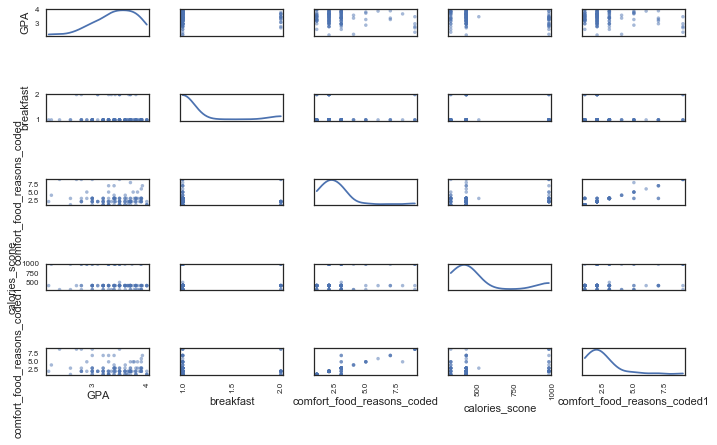

In [7]:
pd.tools.plotting.scatter_matrix(useful_columns.loc[:, "GPA":"comfort_food_reasons_coded1"], diagonal="kde")
plt.tight_layout()
plt.show()

In [8]:
features = numeric_variables.columns
features_by_dtype = {}
for f in features:
    dtype = str(numeric_variables[f].dtype)
    
    if dtype not in features_by_dtype.keys():
        features_by_dtype[dtype] = [f]
    else:
        features_by_dtype[dtype] += [f]
discrete_features = [i for i in features_by_dtype["int64"] if (not "calories" in i) & (numeric_variables[i].unique().size > 2) & ("coded" not in i)]
discrete_features += ["calories_day","cook","exercise","father_education","income","life_rewarding","mother_education","persian_food"]



In [12]:
from scipy.stats import pearsonr,spearmanr,kendalltau
from pandas import DataFrame

def correlation_table(numeric_variables,useful_columns,target):
    
    rows_list = []

    for x2 in useful_columns:
    
        x1 = target
        
        row = {}
        row["Variable A"] = x1 
        row["Variable B"] = x2
        
        x3 = numeric_variables[numeric_variables[x1].notnull() & numeric_variables[x2].notnull()]

        pearson = pearsonr(x3[x1],x3[x2])
        row["Pearson"] = pearson[0]
        row["Pearson's p-value"] = pearson[1]

        spearman = spearmanr(x3[x1],x3[x2])
        row["Spearman"] = spearman[0]
        row["Spearman's p-value"] = spearman[1]

        kendall = kendalltau(x3[x1],x3[x2])
        row["Kendall"] = kendall[0]
        row["Kendall's p-value"] = kendall[1]

        rows_list.append(row)

    ordered_columns = ["Variable A", "Variable B", "Pearson", "Pearson's p-value", "Spearman", "Spearman's p-value", "Kendall", "Kendall's p-value"]
    
    corr = DataFrame(rows_list, columns=ordered_columns).round(2)
    corr = corr[(corr["Variable A"] == target) | (corr["Variable B"] == target)]
    return corr

In [13]:
from seaborn import regplot, set_style
from matplotlib.pyplot import show, suptitle
from scipy.stats import linregress
from IPython.display import display
def display_nxn_analysis(numeric_variables,useful_columns,target):
    print("Correlation Scores")
    corr = correlation_table(numeric_variables,[useful_columns],target)
    display(corr)

In [14]:
GPA_corr = correlation_table(numeric_variables,discrete_features,"GPA")
pearson_p = GPA_corr["Pearson's p-value"] < 0.05

GPA_corr = GPA_corr.loc[pearson_p ]
GPA_corr

,Variable A,Variable B,Pearson,Pearson's p-value,Spearman,Spearman's p-value,Kendall,Kendall's p-value
1,GPA,cuisine,-0.20,0.02,-0.06,0.50,-0.05,0.51
3,GPA,ethnic_food,0.20,0.02,0.19,0.03,0.15,0.03
7,GPA,grade_level,0.23,0.01,0.23,0.01,0.17,0.01
18,GPA,parents_cook,0.19,0.04,0.23,0.01,0.18,0.01


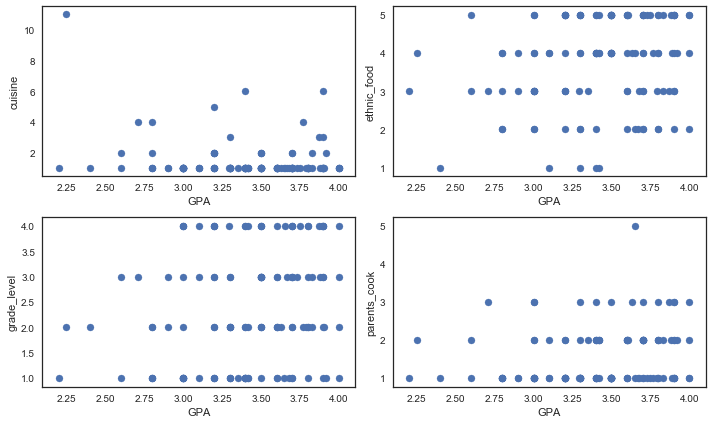

In [47]:


plt.subplot(2,2,1)
plt.scatter(useful_columns['GPA'],useful_columns['cuisine'])
plt.xlabel("GPA")
plt.ylabel('cuisine')

plt.subplot(2,2,2)
plt.scatter(useful_columns['GPA'],useful_columns['ethnic_food'])
plt.xlabel("GPA")
plt.ylabel('ethnic_food')

plt.subplot(2,2,3)
plt.scatter(useful_columns['GPA'],useful_columns['grade_level'])
plt.xlabel("GPA")
plt.ylabel('grade_level')

plt.subplot(2,2,4)
plt.scatter(useful_columns['GPA'],useful_columns['parents_cook'])
plt.xlabel("GPA")
plt.ylabel('parents_cook')

plt.tight_layout()
